In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('house_prices_subset_IrinaCruceru.csv')
print(df.shape)
df.head()

(1168, 19)


,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SalePrice
0,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,145000
1,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,178000
2,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,85000
3,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,175000
4,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,127000


In [12]:
print(df.columns.tolist())

['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'SalePrice', 'TotalFinishedSF', 'BsmtFinRatio', 'FlrRatio']


In [5]:
# Total finished living area (above + basement)
df['TotalFinishedSF'] = df['GrLivArea'] + df['TotalBsmtSF']

# Ratio of finished basement area to total basement area
df['BsmtFinRatio'] = (df['BsmtFinSF1'] + df['BsmtFinSF2']) / (df['TotalBsmtSF'] + 1)

# Total living space per floor (proportion of 1st to 2nd floor)
df['FlrRatio'] = df['1stFlrSF'] / (df['2ndFlrSF'] + 1)

In [6]:
features = ['TotalFinishedSF', 'BsmtFinRatio', 'FlrRatio']

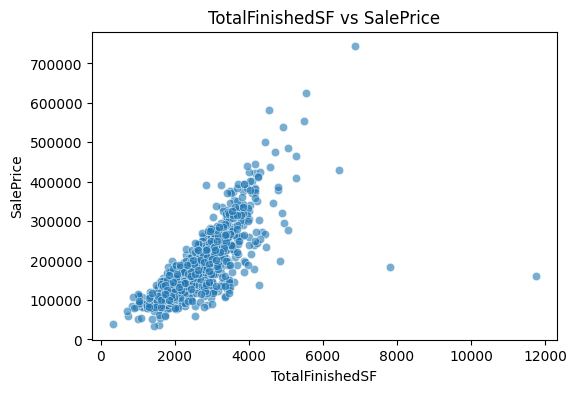

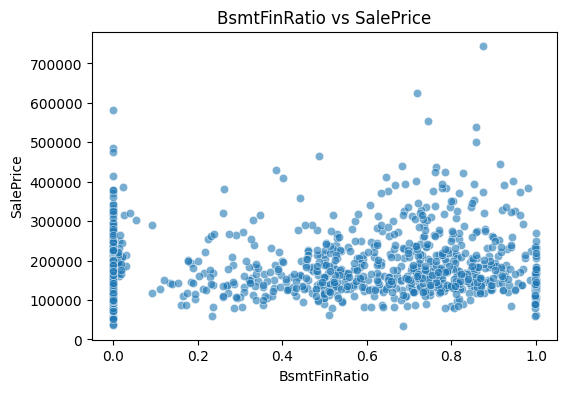

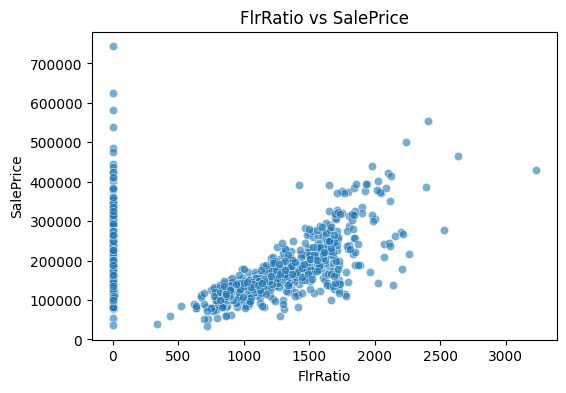

In [8]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y="SalePrice", alpha=0.6)
    plt.title(f"{feature} vs SalePrice")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

In [18]:
correlations = df[['TotalFinishedSF', 'BsmtFinRatio', 'FlrRatio','SalePrice']].corr()['SalePrice']
correlations

,SalePrice
TotalFinishedSF,0.763242
BsmtFinRatio,0.109589
FlrRatio,0.099737
SalePrice,1.000000


1. TotalFinishedSF vs SalePrice

There is a strong positive linear relationship, as TotalFinishedSF increases, SalePrice clearly rises.
Very strong positive correlation (0.76) — larger total finished space strongly predicts higher prices.

2. BsmtFinRatio vs SalePrice

This one looks weakly related to SalePrice. Most homes cluster around 0 (no finished basement) or 1 (fully finished basement), with no clear trend in-between.

3. FlrRatio vs SalePrice

Big cluster around 0 (a lot of homes don't have a second floor). Houses with balanced floor ratios (around 1) or larger total area tend to have higher prices. Weak correlation (0.10).

TotalFinishedSF can be used in the model as it looks promising. The other 2 could be used after some transformation (perhaps replace FlrRatio with a simpler binary Has2ndFloor).